# Box Plot of all Data
This function plots a box plot of all the prediction scores from the CNN. Since the network uses the sigmoid curve, roughly anything greater than 0.5 will indicate that the data point is a female, while anything less than 0.5 will indicate that the data point is a male.

## Importing Libraries
We specifically need numpy and matplotlib for plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Getting Predictions
Getting the prediction scores from the .txt files. Includes both flipped and unflipped

In [2]:
def get_predictions(fold_num, flip):
    file_name = ""
    if (flip):
        file_name = "prediction_flip/prediction_flip_" + str(fold_num) + ".txt" 
    else:
        file_name = "predictions/prediction_" + str(fold_num) + ".txt" 
    prediction_file = open(file_name, mode='r')
    lines = prediction_file.readlines()
    prediction_file.close()
    predictions = []
    for line in lines:
        predictions.append(float(line))
    return predictions

## Average Prediction
Get the average data from both the normal and flipped prediction scores

In [3]:
def average_prediction(normal, flip):
    predictions = []
    for i in range(0, len(normal)):
        predictions.append((normal[i] + flip[i])/2)
    return predictions

## Split by Sex
Split the prediction scores between male and female predictions, then add to existing array from other folds

In [4]:
def split_by_sex(predictions, male_predictions, female_predictions):
    for score in predictions:
        if (score > 0.5):
            female_predictions.append(score)
        else:
            male_predictions.append(score)

## Plot Box Plot
Plot the box plot of all the data points

In [5]:
def plot_boxplot(prediction, sex, type):
    prediction_np = np.array(prediction).astype(np.float)
    fig1, ax1 = plt.subplots()
    ax1.set_title(sex + ' Prediction Scores (all Folds) - ' + type)
    ax1.boxplot(prediction_np)

## Main Function
Collates all of the folds together, then analyzes prediction scores

In [10]:
def process_prediction_scores():
    male = []
    female = []
    male_flip = []
    female_flip = []
    male_average = []
    female_average = []
    for i in range(1, 6):
        predictions = get_predictions(i, False)
        predictions_flip = get_predictions(i, True)
        prediction_average = average_prediction(predictions, predictions_flip)
        split_by_sex(predictions, male, female)
        split_by_sex(predictions_flip, male_flip, female_flip)
        split_by_sex(prediction_average, male_average, female_average)

    plot_boxplot(male, "Male", "Unflipped")
    plot_boxplot(female, "Female", "Unflipped")
    plot_boxplot(male_flip, "Male", "Flipped")
    plot_boxplot(female_flip, "Female", "Flipped")
    plot_boxplot(male_average, "Male", "Average")
    plot_boxplot(female_average, "Female", "Average")

## Running main
Call main func

<ipython-input-5-f883d00321a2>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_np = np.array(prediction).astype(np.float)
<ipython-input-5-f883d00321a2>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_np = np.array(prediction).astype(np.float)
<ipython-input-5-f883d00321a2>:2: DeprecationWarning: `np.float` is a de

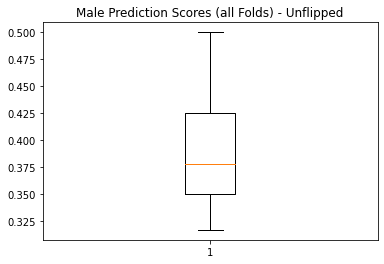

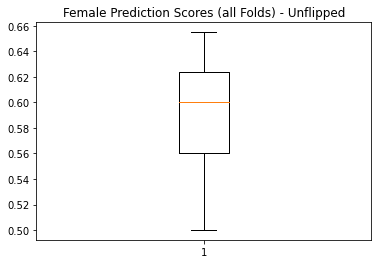

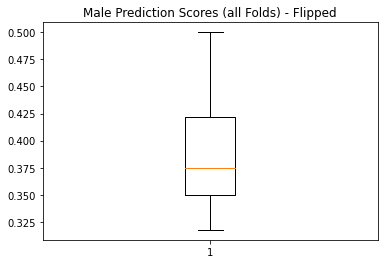

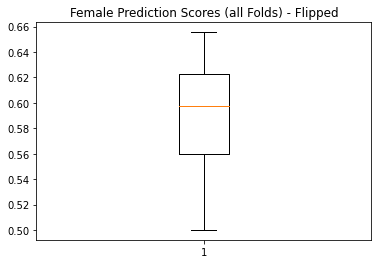

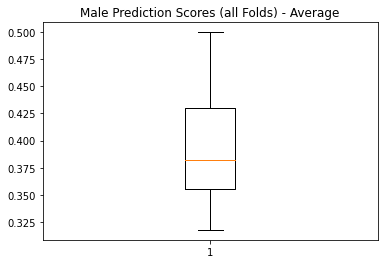

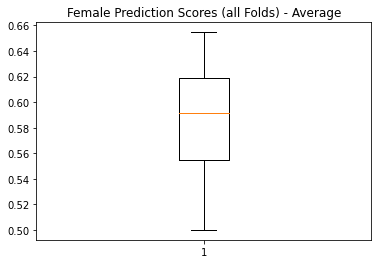

In [11]:
process_prediction_scores()